In [ ]:
## Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
## Import Data
df = pd.read_csv("ECommerceDataset.csv")

In [ ]:
## Explore Data
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.nunique().sort_values()

Churn                             2
Complain                          2
Gender                            2
PreferredLoginDevice              3
CityTier                          3
MaritalStatus                     3
SatisfactionScore                 5
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
HourSpendOnApp                    6
PreferredPaymentMode              7
NumberOfAddress                  15
OrderAmountHikeFromlastYear      16
OrderCount                       16
CouponUsed                       17
DaySinceLastOrder                22
WarehouseToHome                  34
Tenure                           36
CashbackAmount                  220
CustomerID                     5630
dtype: int64

In [ ]:
for column in df.columns:
    print(column,(df[column].isnull().mean()*100).round(2))

CustomerID 0.0
Churn 0.0
Tenure 4.69
PreferredLoginDevice 0.0
CityTier 0.0
WarehouseToHome 4.46
PreferredPaymentMode 0.0
Gender 0.0
HourSpendOnApp 4.53
NumberOfDeviceRegistered 0.0
PreferedOrderCat 0.0
SatisfactionScore 0.0
MaritalStatus 0.0
NumberOfAddress 0.0
Complain 0.0
OrderAmountHikeFromlastYear 4.71
CouponUsed 4.55
OrderCount 4.58
DaySinceLastOrder 5.45
CashbackAmount 0.0


In [ ]:
def fill_nulls(df):
    for column in df.columns:
        column,df[column].fillna(0,inplace=True)
        print(column,(df[column].isnull().mean()*100).round(2))
fill_nulls(df)

CustomerID 0.0
Churn 0.0
Tenure 0.0
PreferredLoginDevice 0.0
CityTier 0.0
WarehouseToHome 0.0
PreferredPaymentMode 0.0
Gender 0.0
HourSpendOnApp 0.0
NumberOfDeviceRegistered 0.0
PreferedOrderCat 0.0
SatisfactionScore 0.0
MaritalStatus 0.0
NumberOfAddress 0.0
Complain 0.0
OrderAmountHikeFromlastYear 0.0
CouponUsed 0.0
OrderCount 0.0
DaySinceLastOrder 0.0
CashbackAmount 0.0


In [ ]:
df.describe().round(2)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.00,5630.0,5630.00
mean,52815.50,0.17,9.71,1.65,14.94,2.80,3.69,3.07,4.21,0.28,14.97,1.67,2.87,4.3,177.22
std,1625.39,0.37,8.63,0.92,8.94,0.93,1.02,1.38,2.58,0.45,4.89,1.89,2.94,3.7,49.19
min,50001.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.0,0.00
25%,51408.25,0.00,1.00,1.00,9.00,2.00,3.00,2.00,2.00,0.00,13.00,1.00,1.00,1.0,146.00
50%,52815.50,0.00,8.00,1.00,13.00,3.00,4.00,3.00,3.00,0.00,14.00,1.00,2.00,3.0,163.00
75%,54222.75,0.00,15.00,3.00,20.00,3.00,4.00,4.00,6.00,1.00,18.00,2.00,3.00,7.0,196.00
max,55630.00,1.00,61.00,3.00,127.00,5.00,6.00,5.00,22.00,1.00,26.00,16.00,16.00,46.0,325.00


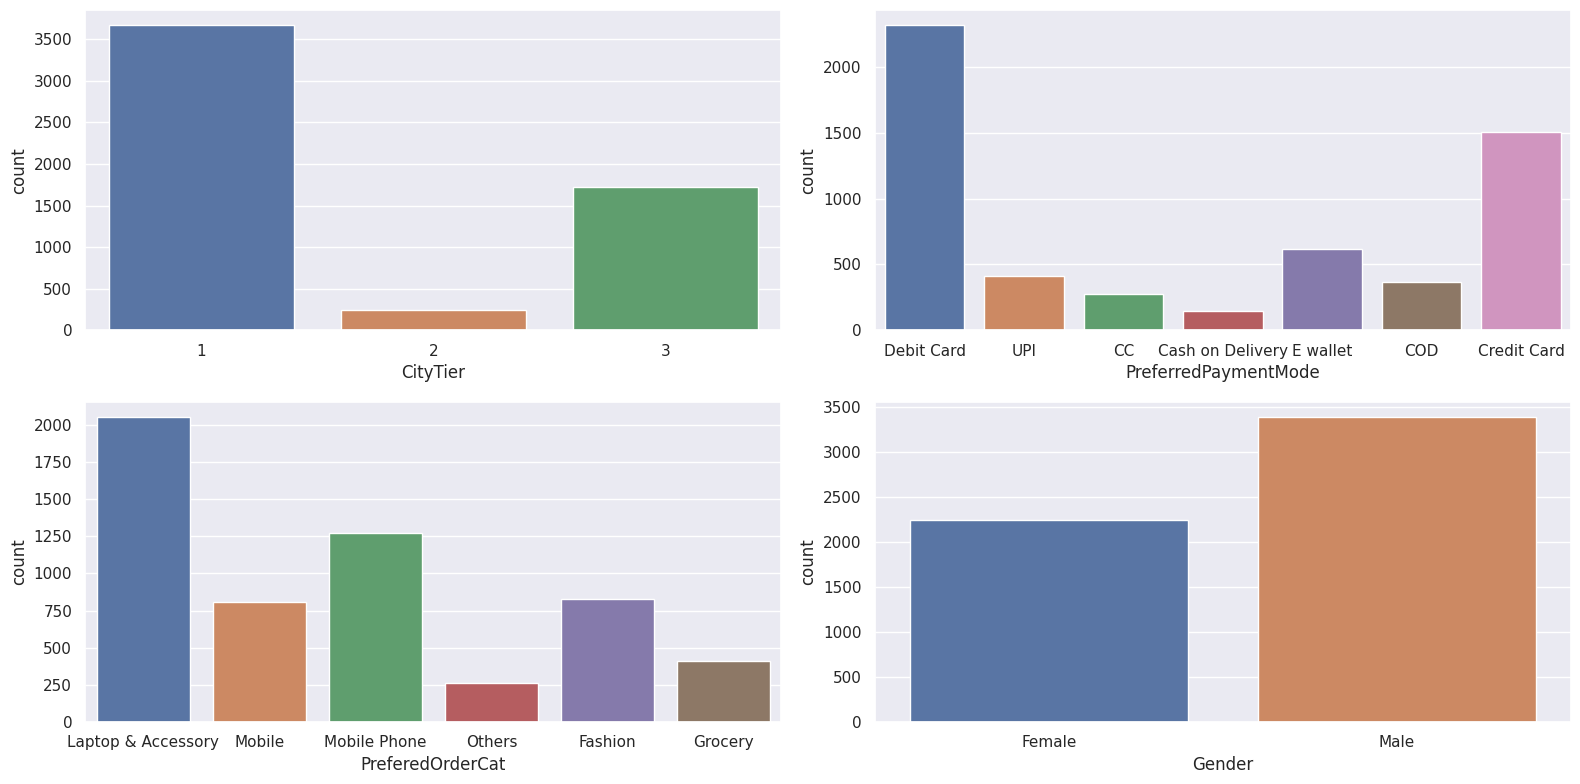

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.countplot(data=df, x='CityTier', ax=axes[0][0])
sns.countplot(data=df, x='PreferredPaymentMode', ax=axes[0][1])
sns.countplot(data=df, x='PreferedOrderCat', ax=axes[1][0])
sns.countplot(data=df, x='Gender', ax=axes[1][1])
plt.tight_layout()

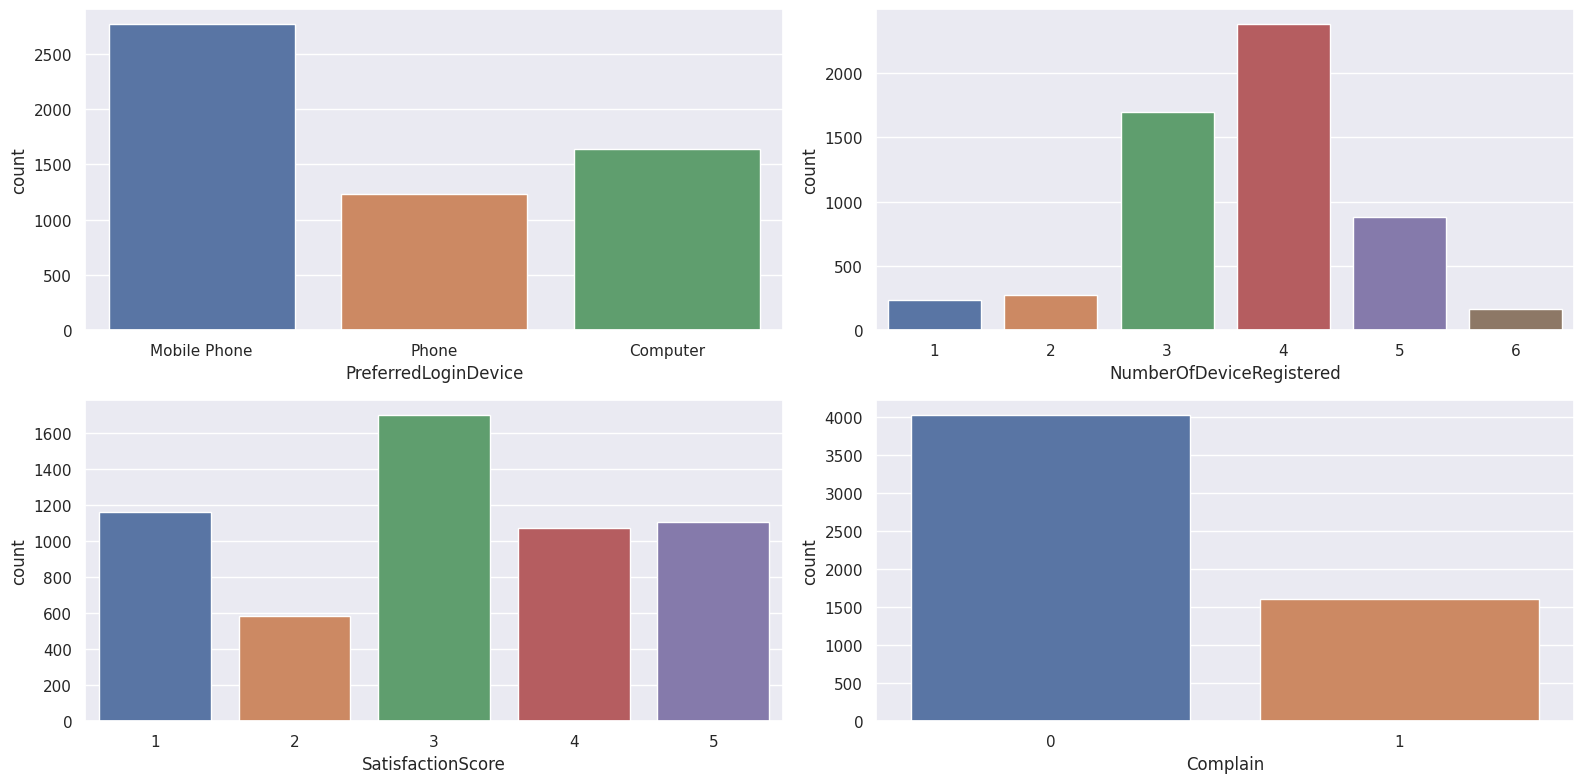

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.countplot(data=df, x='PreferredLoginDevice', ax=axes[0][0])
sns.countplot(data=df, x='NumberOfDeviceRegistered', ax=axes[0][1])
sns.countplot(data=df, x='SatisfactionScore', ax=axes[1][0])
sns.countplot(data=df, x='Complain', ax=axes[1][1])
plt.tight_layout()

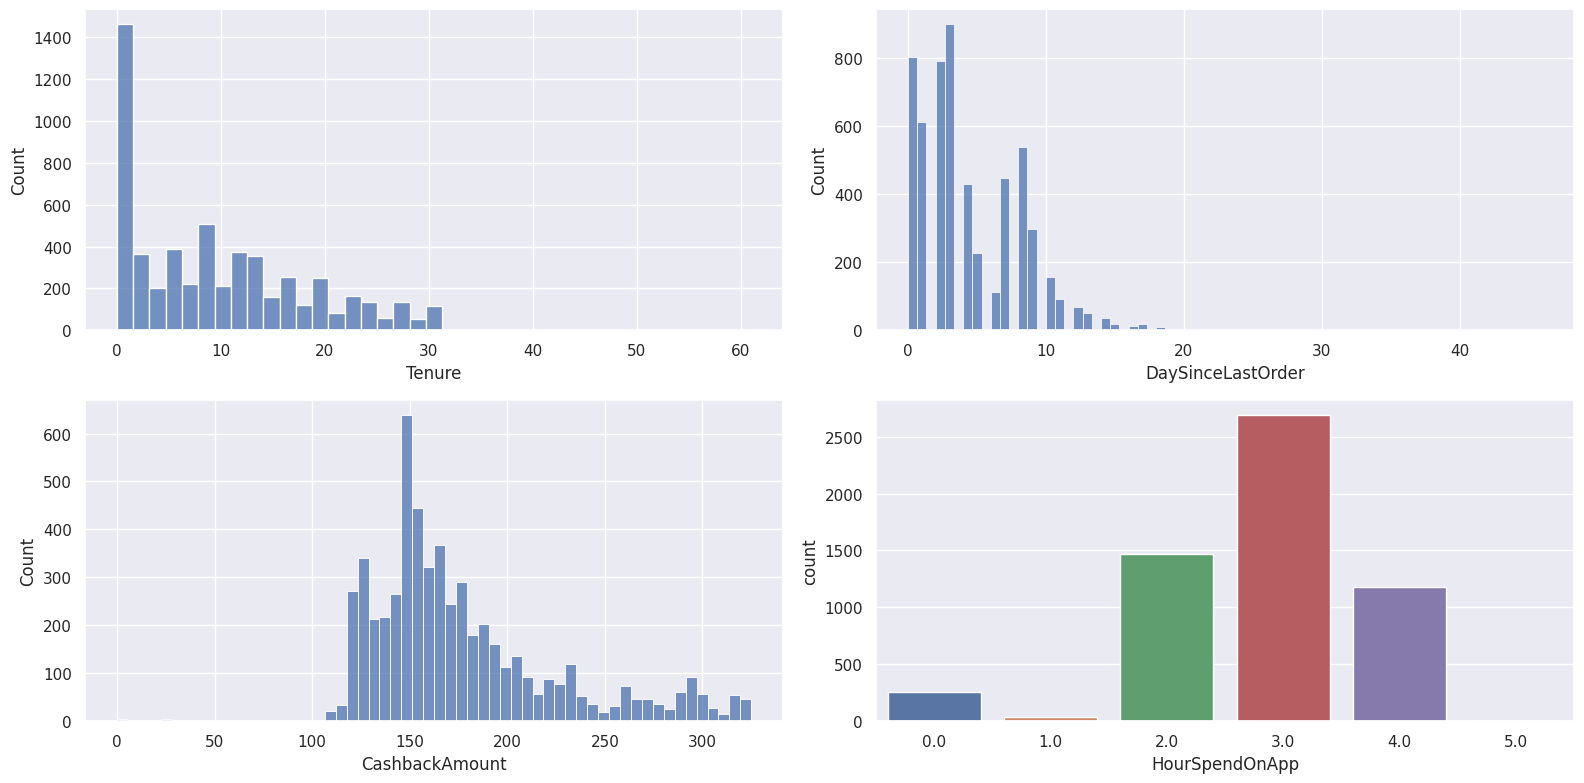

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.histplot(data=df, x='Tenure', ax=axes[0][0])
sns.histplot(data=df, x='DaySinceLastOrder', ax=axes[0][1])
sns.histplot(data=df, x='CashbackAmount', ax=axes[1][0])
sns.countplot(data=df, x='HourSpendOnApp', ax=axes[1][1])
plt.tight_layout()

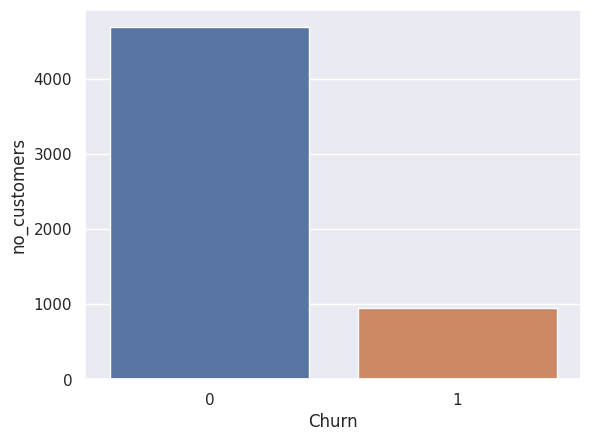

In [ ]:
#Explore No. of customers by Target
df_noCust_by_target = df.groupby(by=['Churn']).agg(
          no_customers=('Churn','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Churn', y='no_customers')
plt.show()

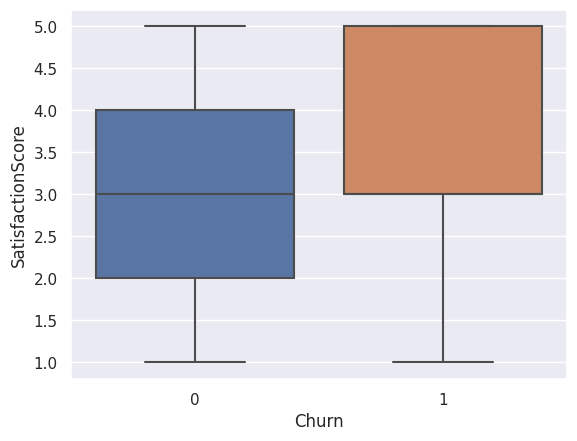

In [ ]:
sns.boxplot(data=df, x = 'Churn', y='SatisfactionScore')
plt.show()

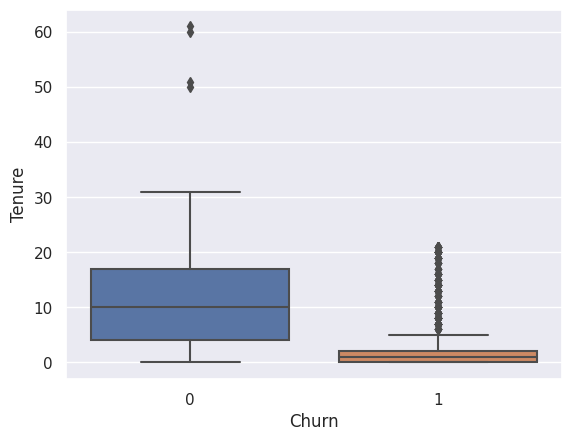

In [ ]:
sns.boxplot(data=df,x="Churn",y='Tenure')
plt.show()

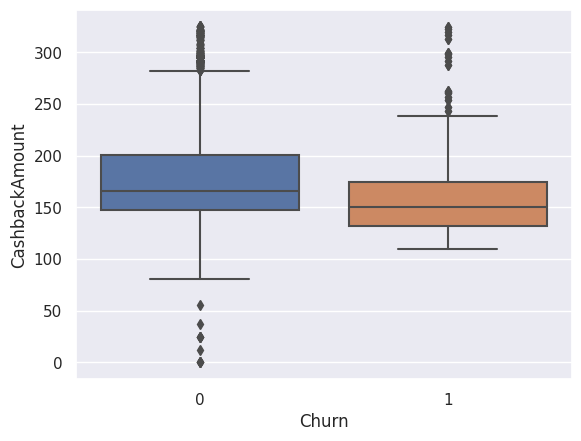

In [ ]:
sns.boxplot(data=df,x="Churn",y='CashbackAmount')
plt.show()

<ipython-input-128-751f1c8f9f9f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Churn','count')).reset_index().pivot('PreferredLoginDevice', 'Churn', 'no_customers')


<Axes: xlabel='Churn', ylabel='PreferredLoginDevice'>

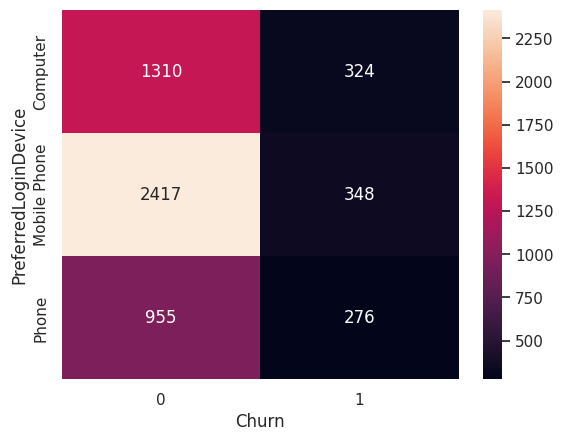

In [ ]:
df_PreferredLoginDevice_by_target = df.groupby(by=['PreferredLoginDevice', 'Churn']).agg(
                              no_customers=('Churn','count')).reset_index().pivot('PreferredLoginDevice', 'Churn', 'no_customers')

sns.heatmap(df_PreferredLoginDevice_by_target, annot=True, fmt='.0f')

In [ ]:
cat_data = pd.DataFrame()

cat_data = pd.concat([cat_data, pd.get_dummies(df['Gender'], prefix='Gender')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['PreferredPaymentMode'], prefix='PreferredPaymentMode')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['PreferedOrderCat'], prefix='PreferedOrderCat')], axis=1)

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].map({'Cash on Delivery':0,
                             'CC':1,
                             'COD':2,
                             'Credit Card':3,
                             'Debit Card':4,
                             'E wallet':5,
                             'UPI':6})

df['PreferedOrderCat'] = df['PreferedOrderCat'].map({'Fashion':0,
                             'Grocery':1,
                             'Laptop & Accessory':2,
                             'Mobile':3,
                             'Mobile Phone':4,
                             'Others':5})


cat_data = pd.concat([cat_data, df['PreferredPaymentMode'], df['PreferedOrderCat']], axis=1)
cat_data

,Gender_Female,Gender_Male,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,PreferredPaymentMode,PreferedOrderCat
0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,6,3
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,4,3
3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2
4,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,3,2
5626,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0
5627,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2
5628,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,3,2


In [ ]:
X = pd.concat([df[['WarehouseToHome', 'HourSpendOnApp', 'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']], cat_data], axis=1)
y = df['Churn']

**Model Creation and Evaluation**

In [ ]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)

    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1414
           1       0.58      0.22      0.32       275

    accuracy                           0.85      1689
   macro avg       0.72      0.59      0.62      1689
weighted avg       0.82      0.85      0.82      1689


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


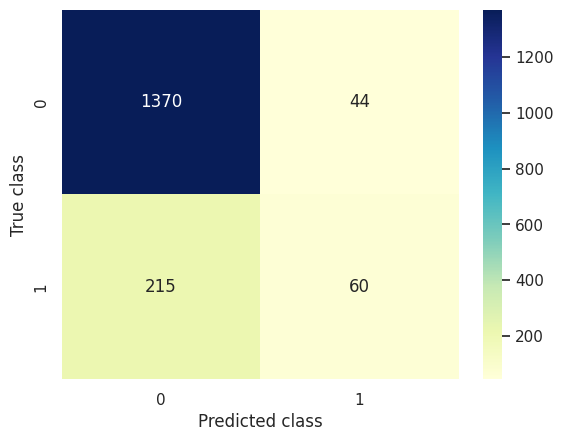

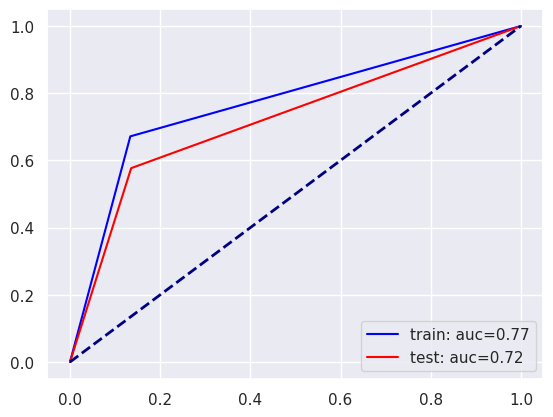

In [ ]:
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1414
           1       0.88      0.68      0.76       275

    accuracy                           0.93      1689
   macro avg       0.91      0.83      0.86      1689
weighted avg       0.93      0.93      0.93      1689


Confusion Matrix: 



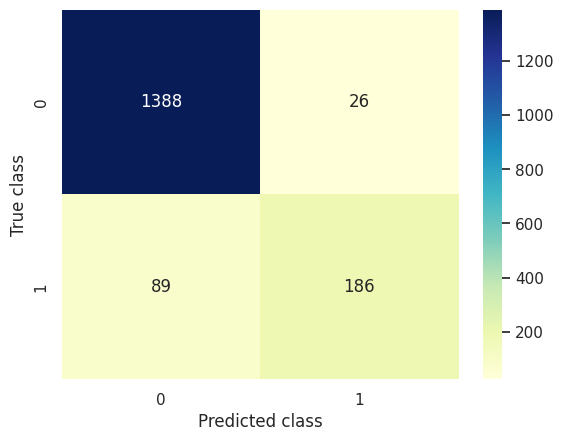

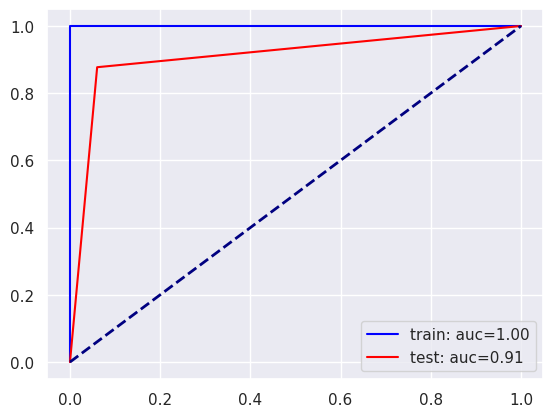

In [ ]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1414
           1       0.49      0.27      0.34       275

    accuracy                           0.84      1689
   macro avg       0.68      0.61      0.63      1689
weighted avg       0.81      0.84      0.81      1689


Confusion Matrix: 



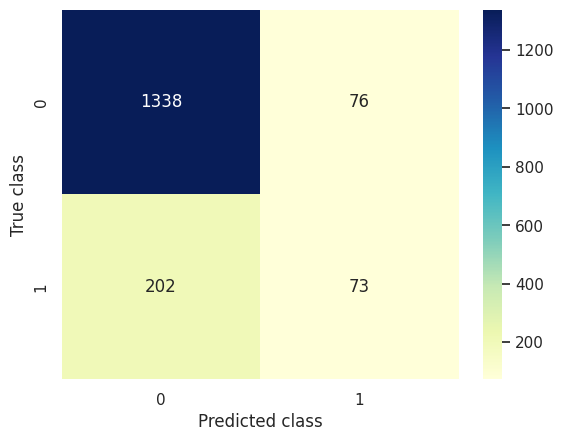

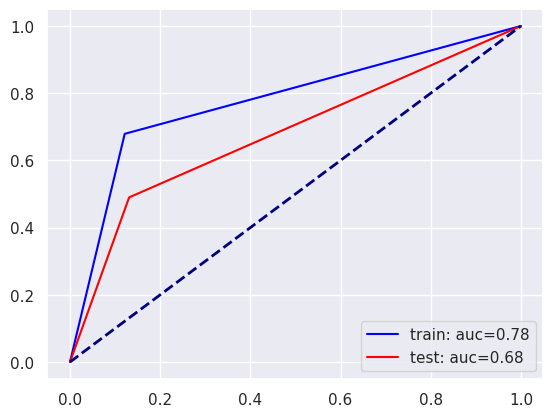

In [ ]:
modelKNN = KNeighborsClassifier()
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

sm.fit(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

* SMOTE and Logistic regression * 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1414
           1       0.34      0.58      0.43       275

    accuracy                           0.75      1689
   macro avg       0.62      0.68      0.63      1689
weighted avg       0.81      0.75      0.77      1689


Confusion Matrix: 



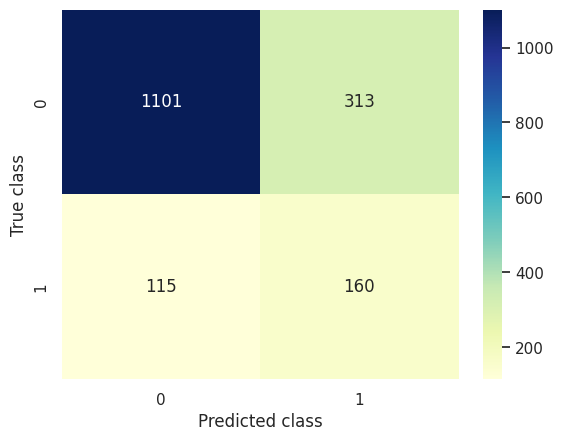

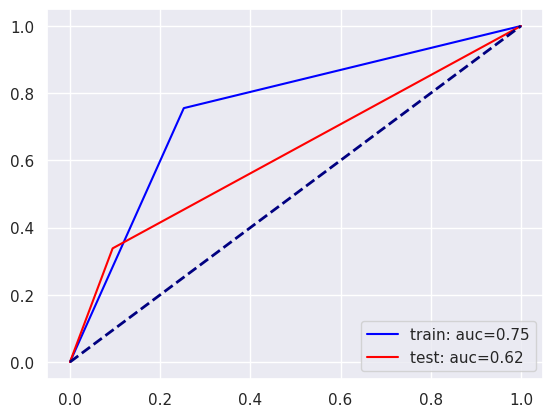

In [ ]:
modelLR = LogisticRegression()
print('* SMOTE and Logistic regression * \n')
fit_evaluate(modelLR, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1414
           1       0.88      0.68      0.77       275

    accuracy                           0.93      1689
   macro avg       0.91      0.83      0.86      1689
weighted avg       0.93      0.93      0.93      1689


Confusion Matrix: 



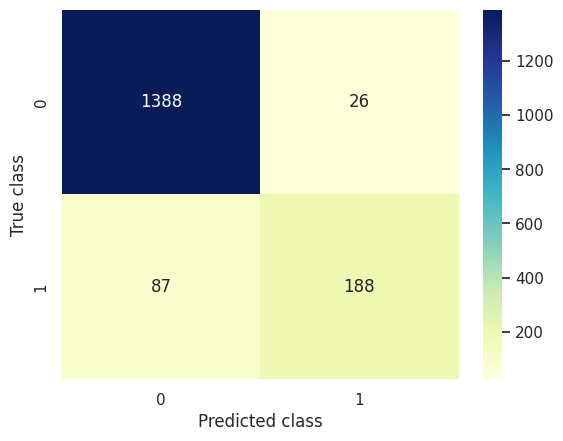

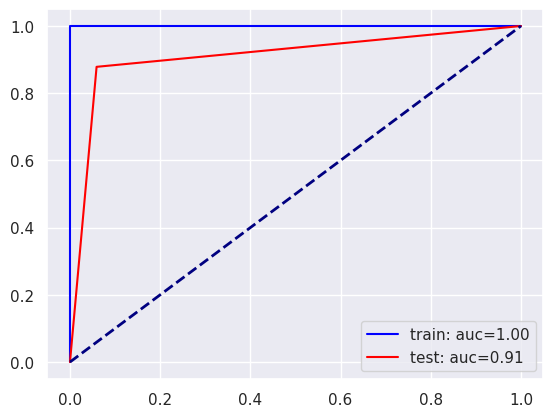

In [ ]:
modelRF = RandomForestClassifier()
print('* SMOTE and Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1414
           1       0.38      0.76      0.51       275

    accuracy                           0.76      1689
   macro avg       0.66      0.76      0.67      1689
weighted avg       0.85      0.76      0.79      1689


Confusion Matrix: 



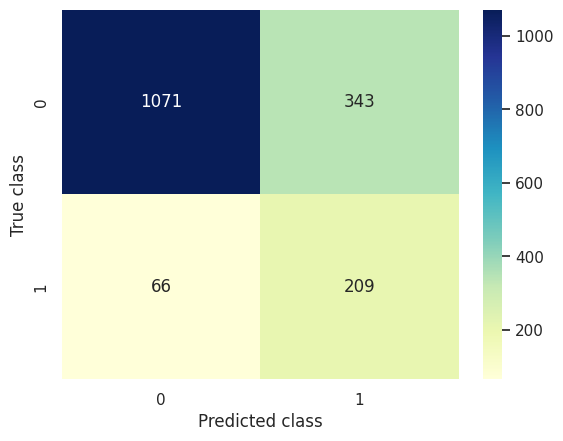

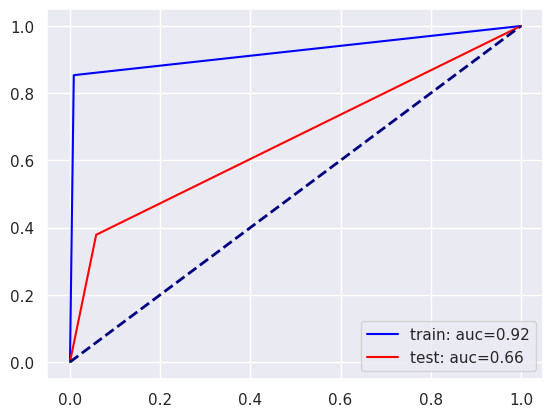

In [ ]:
modelKNN = KNeighborsClassifier()
print('* SMOTE and K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

XGBoost

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1414
           1       0.85      0.70      0.77       275

    accuracy                           0.93      1689
   macro avg       0.90      0.84      0.87      1689
weighted avg       0.93      0.93      0.93      1689


Confusion Matrix: 



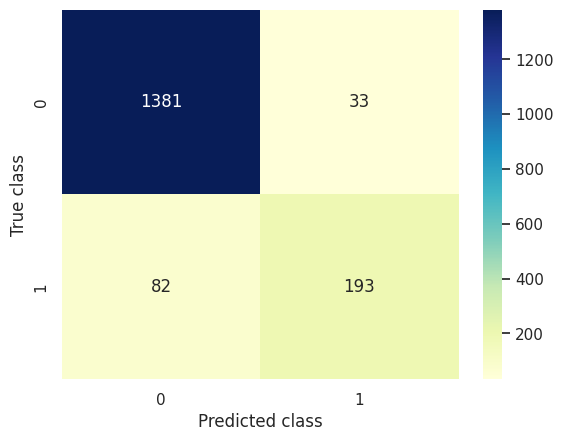

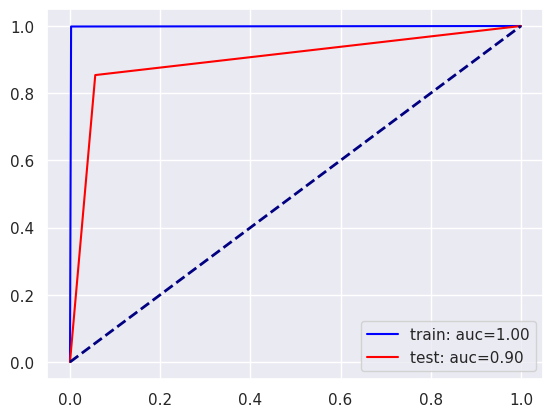

In [ ]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)